<table>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
          Prepared by Berat Yenilen
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Y}{ \mymatrix{cc}{0 & -i \\ i & 0}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

# Deutsch's Algorithm 

In Deutch's problem, we were given an oracle that implements a binary function $f: \{0,1\} \rightarrow \{0, 1 \}$, and we were asked to determine whether this function is $\textit{constant}$ or $\textit{balanced}$. Remember, a binary function $f(x)$ is constant if $f(0) = f(1)$ and it is balanced if $f(0) \neq f(1)$.

Now, we have defined a function $oracle1(qc)$ as an oracle and it takes in a QuantumCircuit, where ancilla qubit is the second one, and implements the oracle function. Now, let us write down a quantum circuit that decides whether the function $oracle1(qc)$ is constant or balanced.

In [1]:
%run oracles.py 
# This command will run the file oracles.py, in which we have defined the oracle function.

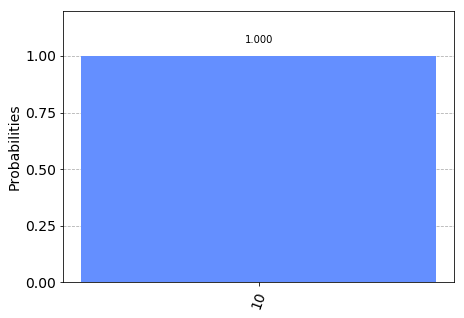

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# First, we must create a quantum circuit.
qreg = QuantumRegister(2, name='qreg')
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg) 

# Apply H, initialize our ancilla qubit, Oracle, Hadamard

# Now, we will apply a Hadamard gate to the first qubit.
qc.h(0)

# Initialize the ancilla qubit to |-> state
qc.x(1)
qc.h(1)

# Since the qubits go bad really quickly, qiskit usually applies the measurement operation right after 
# the last time that qubit is used. Putting a barrier prevents qiskit from doing that.
qc.barrier()  

# Now, we should apply the oracle function.
oracle1(qc)
qc.barrier()

# Now, apply another Hadamard gate to the first qubit.
qc.h(0)
qc.h(1)

# Finally we should measure.
qc.measure(qreg, creg)

# Let's see what our circuit looks like.
qc.draw(output='mpl')

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)
result = job.result().get_counts(qc)

plot_histogram(result)


As you can see the only result we got was 10. Remember, our variable qubit was in the first index so we got the result 1 for it so the oracle must be balanced, right ? NO!!. Remember when you perform a computation using qiskit and when your circuit looks like the one below, your state is simply $\ket{q_1 q_0}$. This was because we might want to represent some numbers in binary representation, you will see an example when we discuss QFT, we wanted our qubits to be ordered in according to their significance. 

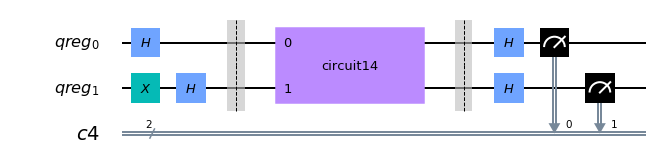

In [14]:
qc.draw(output='mpl')

Looking at our result again, we see that we actually got 0 as our result, which implies a balanced oracle function. Now, let's see how we have defined this $oracle1(qc)$ function.

In [5]:
from qiskit import *
import numpy as np

def oracle1(qc):
    # We initialize a new quantum circuit with 2 qubits. Notice that we just gave 2 as argument.
    # As long as you don't make a measurement, it is OK not to define any quantum or classical register
    oracle_circuit = QuantumCircuit(2) 
    
    # There are various ways to implement a constant function. You can just not do anything, 
    # or you can just apply an X gate, or apply a CNOT(0,1) gate, etc. We went simple and applied an 
    # X gate or nothing, randomly.
    if np.random.randint(2) == 1:
        oracle_circuit.x(0)

    # Now, we want to add this gate to our original circuit. We could have applied the gates directly to qc,
    # but then you would be able to see what I did, whereas you shouldn't be able to see what the oracle is like.
    # So, we can use to_gate() function to convert this circuit into a gate and apply
    qc.append(oracle_circuit.to_gate(), range(2))
    return 1


It was pretty trivial to see how can we construct one of the balanced functions, namely identity. We just didn't mess with the qubit.
As an exercise, please write down a quantum circuit that simulates the behaviour of the other balanced function, namely $f(x) = \neg x$.

In [6]:
from qiskit import *
import numpy as np

def oracle_yours(qc):
    oracle_circuit = QuantumCircuit(2) 
    
    # Write down the circuit in here. 

    
    ##################################
    
    qc.append(oracle_circuit.to_gate(), range(2))
    return 1


# Deutsch-Jozsa Algorithm 

Let us move on to a more interesting example you have covered in the lectures. Our function is defined as $f(x):\{0,1\}^n \rightarrow \{0, 1\}$. The skeleton of our circuit in this case is still the same. We put our qubits into superposition of all possible states, apply the oracle, convert the superpositions back by applying the Hadamard gates and finally measure. Below is a code that does exactly this:

In [24]:
%run oracles.py

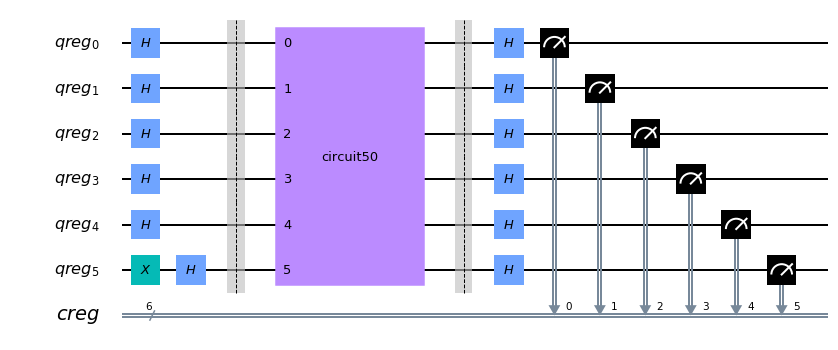

In [30]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

n = 5
# First, we must create a quantum circuit.
# We need n+1 qubits, since (n+1)th one is going to be an ancilla.
qreg = QuantumRegister(n+1, name='qreg')
creg = ClassicalRegister(n+1, name='creg')
qc = QuantumCircuit(qreg, creg) 

# Now, we will apply Hadamard gates to the first n qubits.
for i in range(n):
    qc.h(i)
    
# We must also initialize the ancilla qubit to |-> state.
qc.x(n)
qc.h(n)

# Let's put the barrier so it look cool.
qc.barrier()  

# Now, we should apply the oracle function. This time we also need to give n as an argument.
oracle_type = oracle2(qc, n)
qc.barrier()

# Now, apply another set of Hadamard gates.
for i in range(n+1):
    qc.h(i)
    
# Finally we should measure our qubits.
qc.measure(qreg, creg)
# When we measure what do you expect to see in 0th index, or nth qubit?


# Let's see what our circuit looks like.
qc.draw(output='mpl')

#job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)
#result = job.result().get_counts(qc)
#plot_histogram(result)


Allright, now this time $oracle2(qc, n)$ function actually generates the quantum circuit randomly using the generalized oracle function defined in Qiskit textbook. From the results you obtain, what can you say about the oracle function generated ? If you are confused you can just print oracle_type to see what kind it was.

In [29]:
print("The oracle that has been generated was:", oracle_type)

The oracle that has been generated was: balanced


Let's see how we have defined the oracle functions with more depth. If the oracle is constant we actually don't need to do anything, since the input has no effect on the output. However, if the oracle is balanced one way to do it is to perform n-many CNOT gates where the control qubits are the first n-qubit and the target is the ancilla qubit. This allows us to make us of the phase kickback effect. 

Now let's go over the $oracle2(qc, n)$ function and the $dj\_oracle(case, n)$ function, retrieved from Qiskit Textbook, to see how can we implement such balanced functions.

In [10]:
def oracle2(qc, n):
    if np.random.randint(2) == 1:
        case = "constant"
    else:
        case = "balanced"

    oracle_gate = dj_oracle(case, n)
    qc.append(oracle_gate, range(n+1)) # [0,1,2,3,4,5]
    return case

def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
                
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
            
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    return oracle_qc.to_gate()


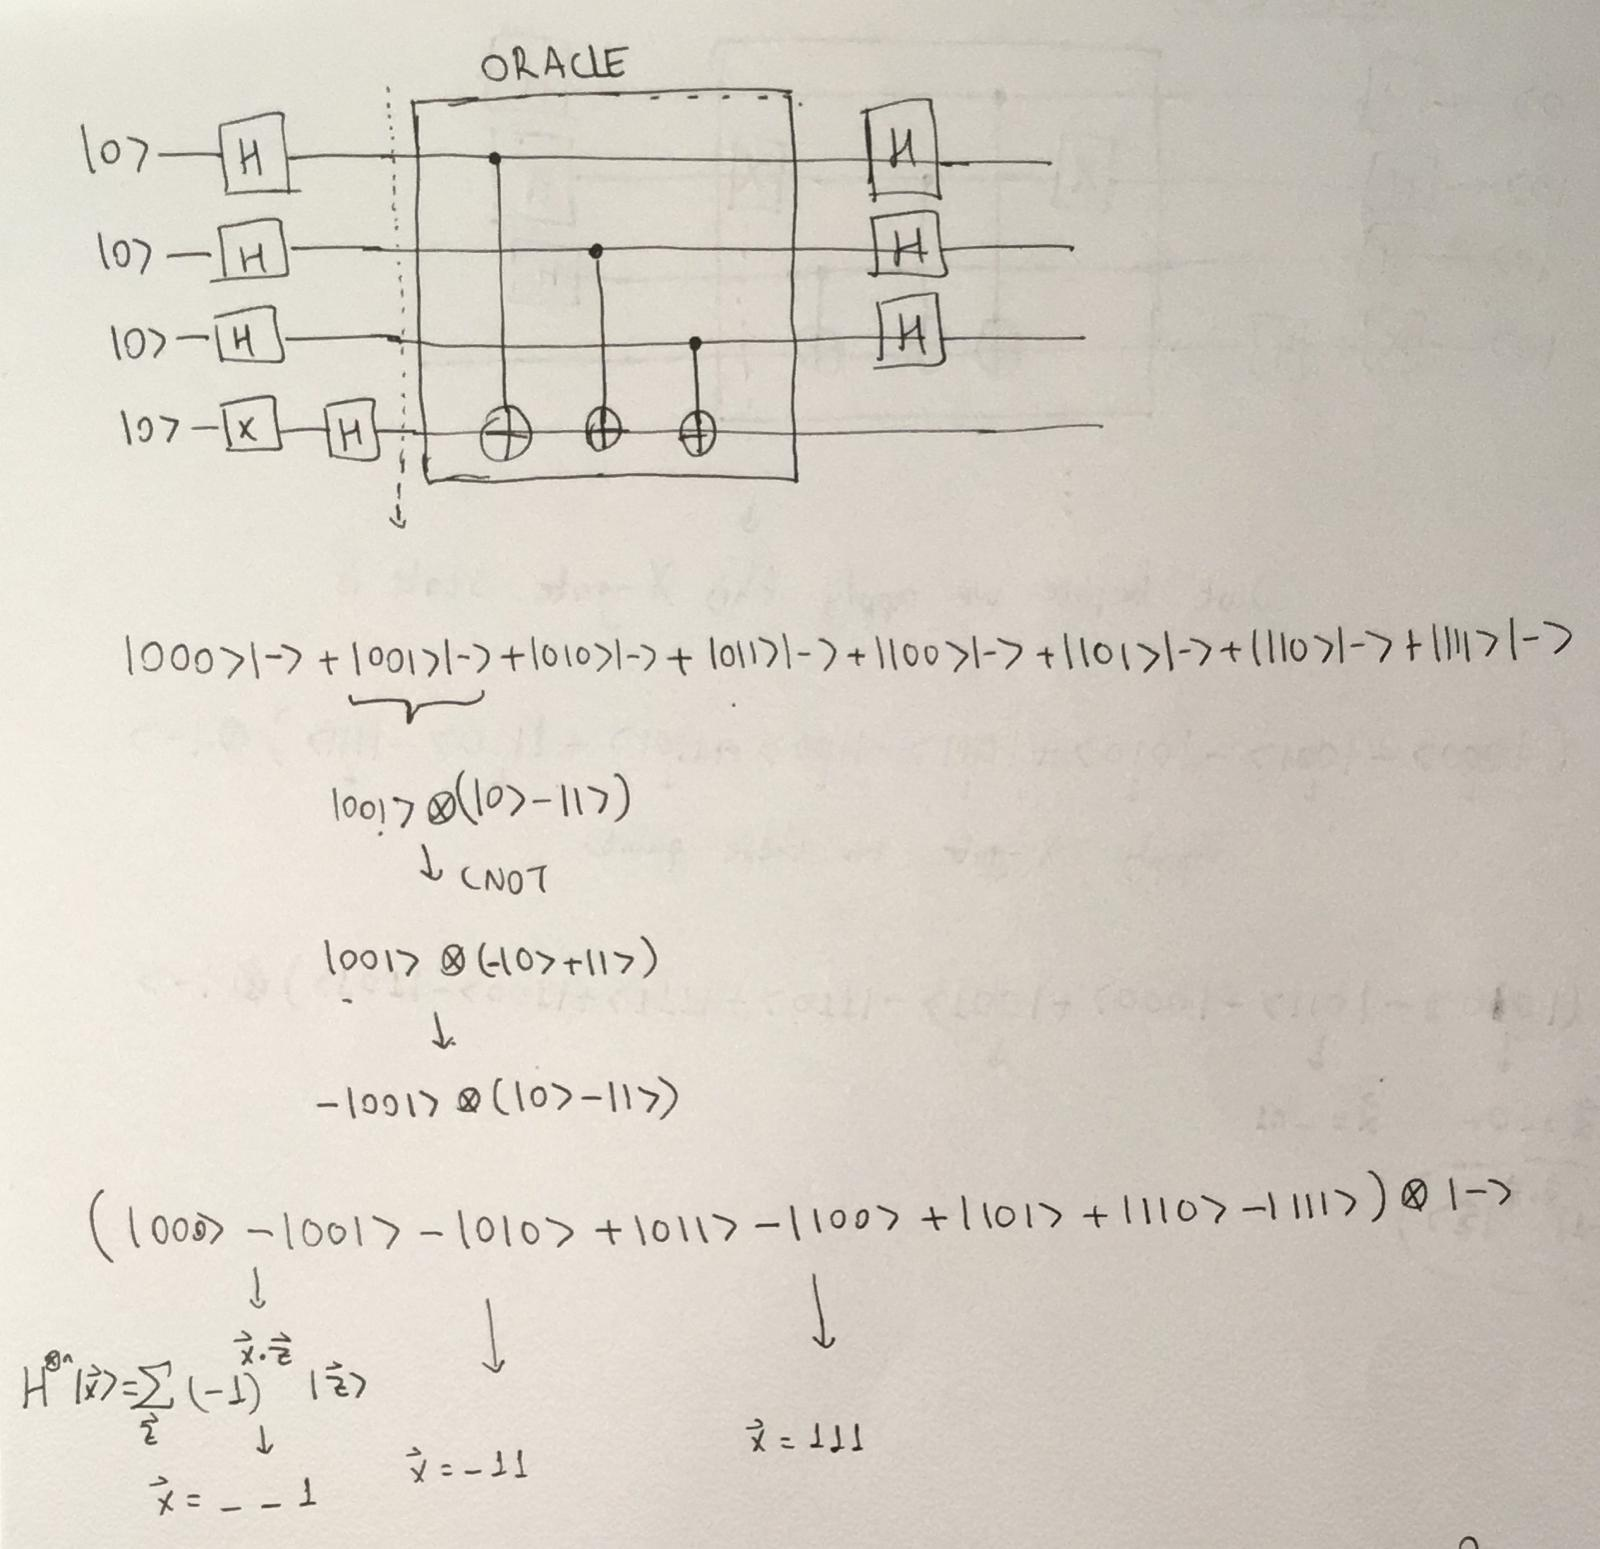

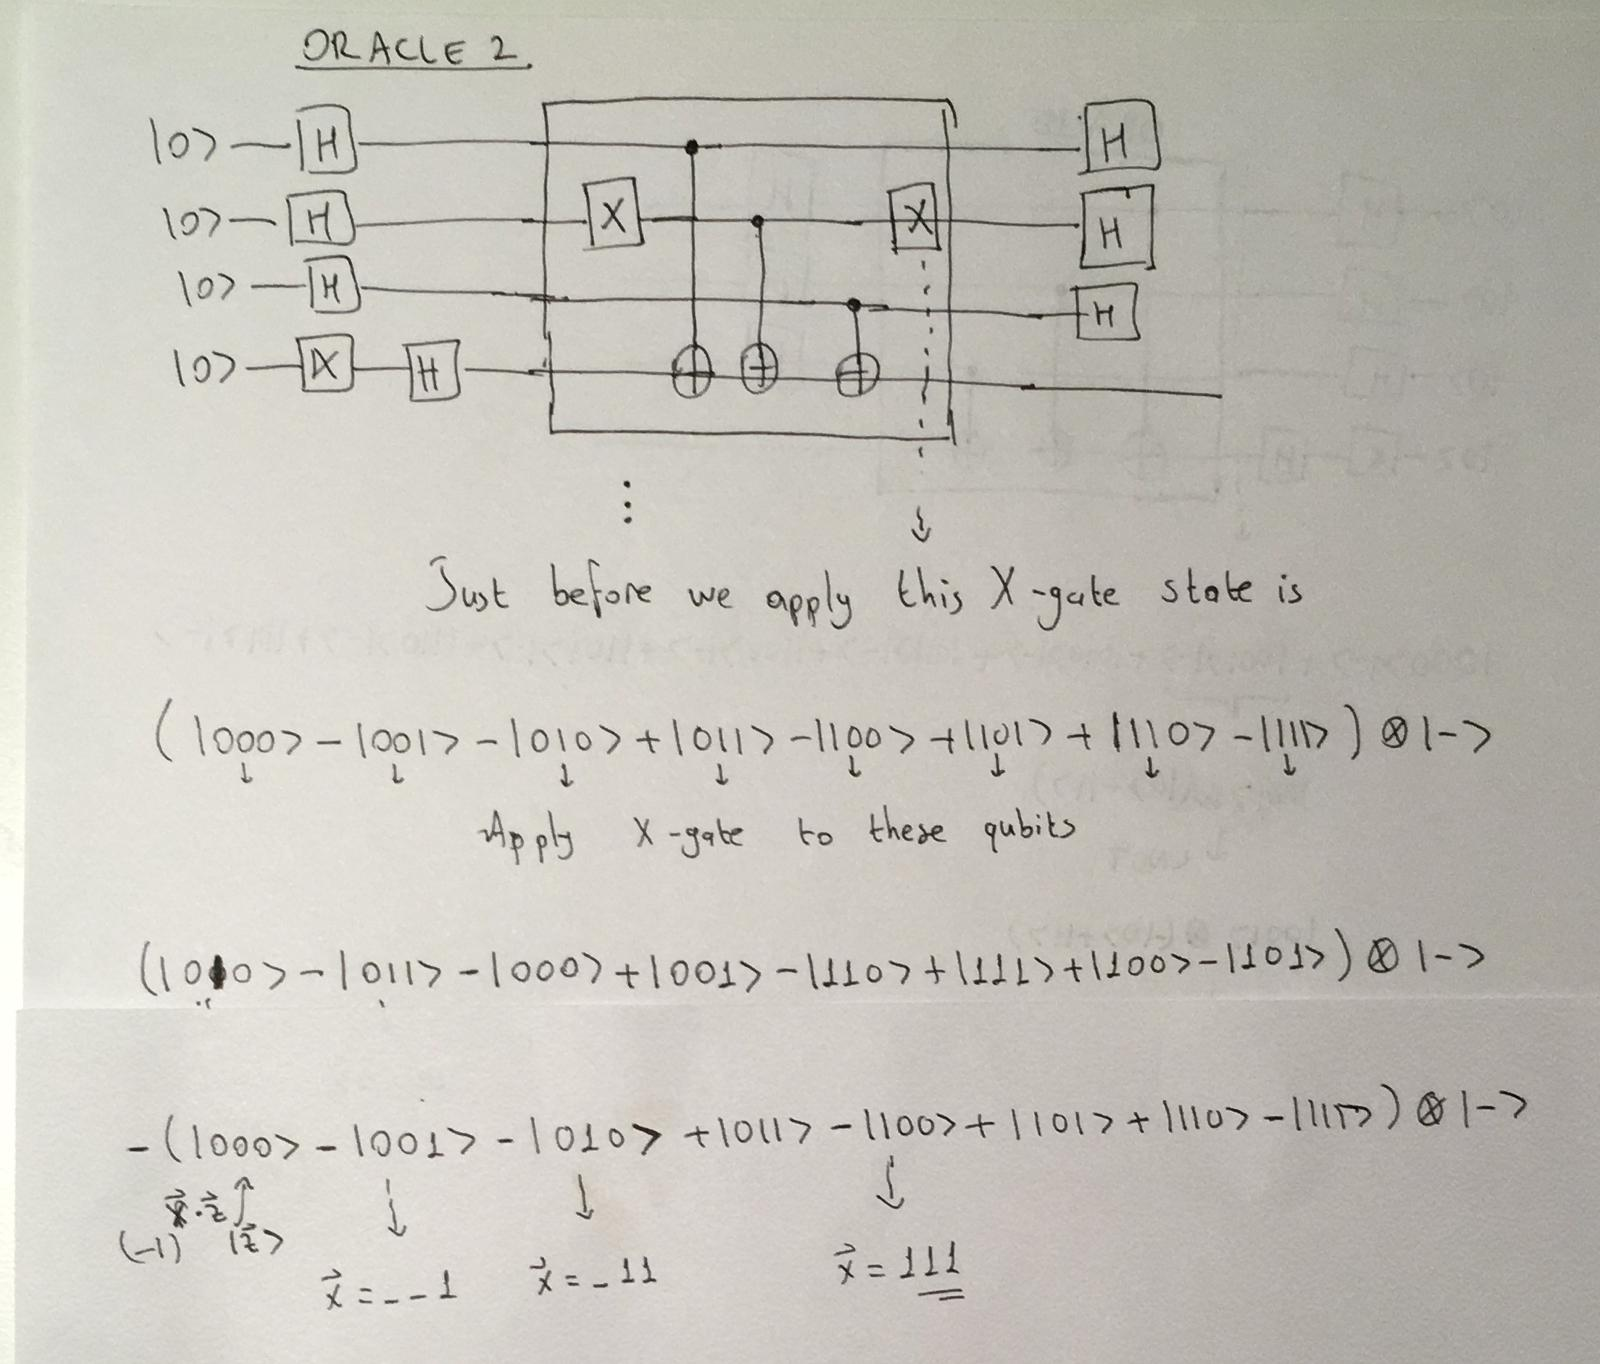

# Suggestions 

I strongly suggest you also read the Qiskit Textbook. What we have covered here is just an overview of the concepts mentioned there and nothing more. I also strongly suggest you to try to find at least another circuit with which you can apply a balanced function. 

Qiskit Textbook: https://qiskit.org/textbook/ch-algorithms/deutsch-josza.html#3.-Creating-Quantum-Oracles--
